### TIME SERIES

Time series models are statistical models used to analyze and forecast data points collected over time. These models are designed specifically for datasets where observations are recorded at regular intervals, such as hourly, daily, monthly, or yearly. Time series models aim to capture the patterns, trends, and seasonality present in the data to make predictions about future values or understand the underlying dynamics of the process generating the data.

##### Time Series Models: 
Several models are used to forecast future values of a time series based on past observations. 

##### Common models include:

* Autoregressive (AR) models
* Moving Average (MA) models
* Autoregressive Integrated Moving Average (ARIMA) models
* Seasonal ARIMA (SARIMA) models
* Vector Autoregression (VAR) models
* Exponential Smoothing State Space Models (ETS)
* Long Short-Term Memory (LSTM) networks (a type of Recurrent Neural Network)
* Prophet (a forecasting tool developed by Facebook)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales_data=pd.read_csv('train.csv')

C:\Users\pooji\AppData\Local\Temp\ipykernel_10104\255843651.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data=pd.read_csv('train.csv')


In [3]:
sales_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
sales_data['Date']=pd.to_datetime(sales_data['Date'])

In [6]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [7]:
sales_data.set_index('Date', inplace=True)

In [8]:
sales_data.drop(['Store','DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday'], axis=1,inplace=True)

In [9]:
sales_data.isnull().sum()

Sales    0
dtype: int64

In [10]:
sales_data=sales_data.resample('D').sum()

In [11]:
sales_data

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
...,...
2015-07-27,10707292
2015-07-28,9115073
2015-07-29,8499962


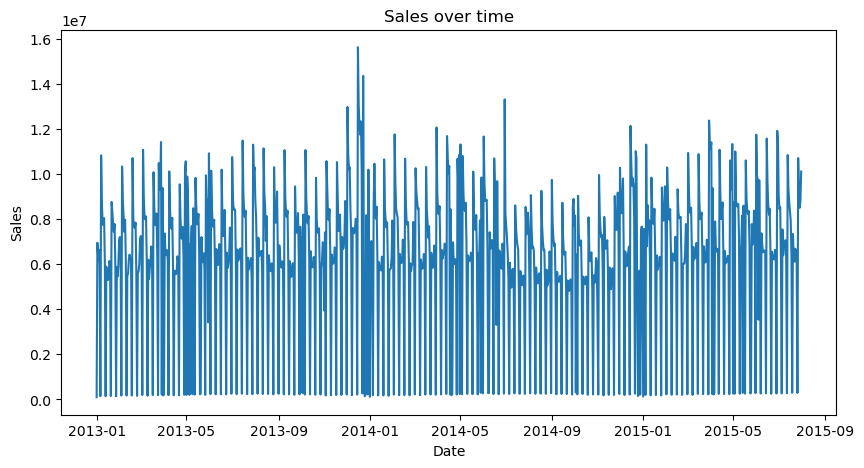

In [12]:
plt.figure(figsize=(10,5))
plt.plot(sales_data)
plt.title('Sales over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### Autoregressive Integrated Moving Average (ARIMA) Model*

* ARIMA is a combination of autoregressive (AR), differencing (I), and moving average (MA) models. It is capable of handling non-stationary time series data by differencing the data to make it stationary before applying AR and MA components.
*  ARIMA models are versatile and widely used for time series forecasting, especially when the data exhibits trends and seasonality. They can handle a wide range of time series patterns and are relatively easy to interpret.


In [13]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

check_stationarity(sales_data['Sales'])

ADF Statistic: -4.7616145245956165
p-value: 6.436731330559263e-05
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


c:\Users\pooji\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


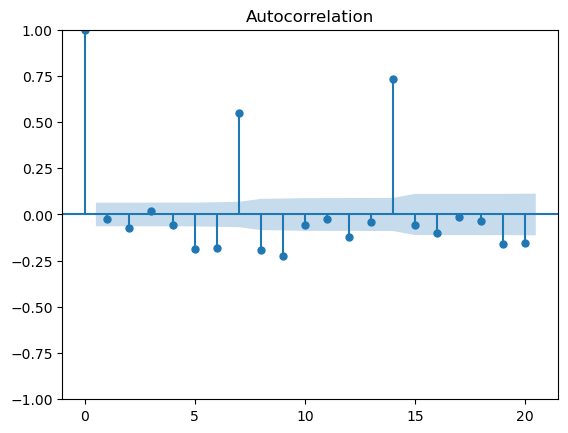

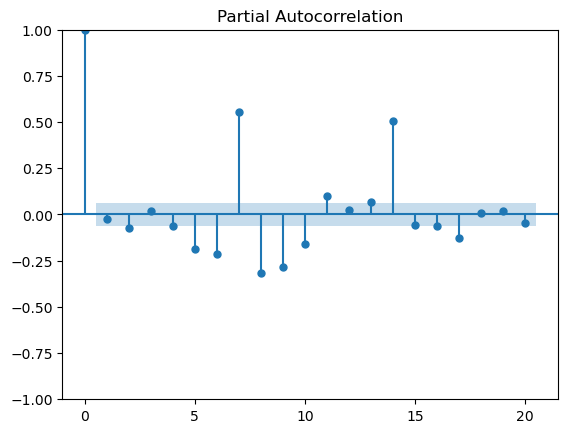

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plot_acf(sales_data, lags=20)
plot_pacf(sales_data, lags=20)
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA
# Define the model
p = 7  # autoregressive order
d = 0  # differencing order
q = 0  # moving average order

model = ARIMA(sales_data, order=(p, d, q))  # replace p, d, q with appropriate values

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  942
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -15210.961
Date:                Tue, 27 Feb 2024   AIC                          30439.922
Time:                        08:08:46   BIC                          30483.554
Sample:                    01-01-2013   HQIC                         30456.553
                         - 07-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.235e+06   1.19e+05     52.486      0.000       6e+06    6.47e+06
ar.L1          0.0387      0.019      2.038      0.042       0.001       0.076
ar.L2          0.0237      0.026      0.902      0.3

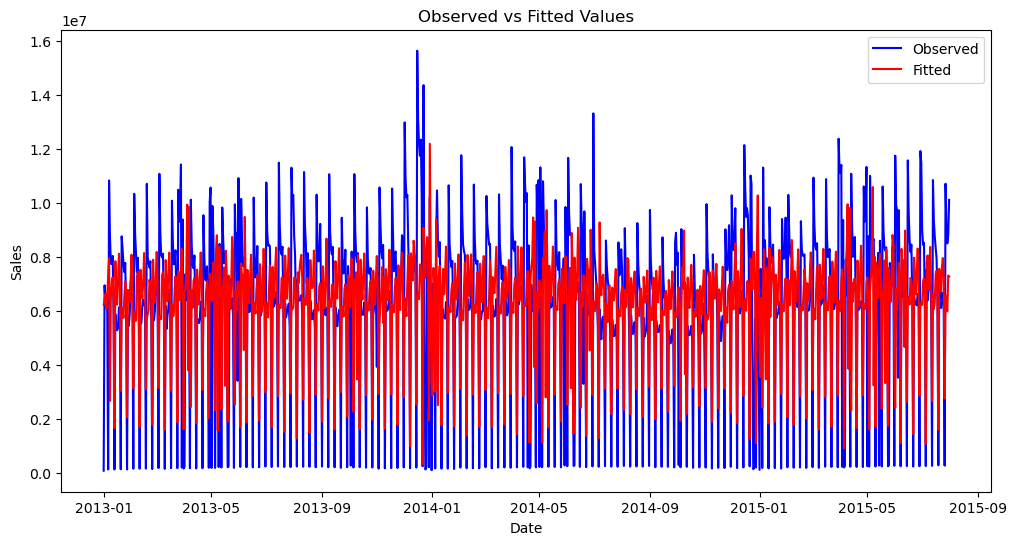

In [16]:
# Plot observed sales data
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['Sales'], label='Observed', color='blue')

# Plot fitted values
plt.plot(sales_data.index, model_fit.fittedvalues, label='Fitted', color='red')

plt.title('Observed vs Fitted Values')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [17]:
# Forecast
forecast = model_fit.forecast(steps=30)

# Print the forecast
print(forecast)

2015-08-01    6.554092e+06
2015-08-02    1.773245e+06
2015-08-03    7.688154e+06
2015-08-04    6.706772e+06
2015-08-05    6.291363e+06
2015-08-06    7.393954e+06
2015-08-07    8.941181e+06
2015-08-08    7.059559e+06
2015-08-09    3.584862e+06
2015-08-10    6.899416e+06
2015-08-11    6.092260e+06
2015-08-12    5.482060e+06
2015-08-13    6.507563e+06
2015-08-14    7.919460e+06
2015-08-15    7.097836e+06
2015-08-16    4.819781e+06
2015-08-17    6.762048e+06
2015-08-18    6.132641e+06
2015-08-19    5.390510e+06
2015-08-20    6.074649e+06
2015-08-21    7.156720e+06
2015-08-22    6.879543e+06
2015-08-23    5.483340e+06
2015-08-24    6.713086e+06
2015-08-25    6.301874e+06
2015-08-26    5.582186e+06
2015-08-27    5.952377e+06
2015-08-28    6.684236e+06
2015-08-29    6.625299e+06
2015-08-30    5.792131e+06
Freq: D, Name: predicted_mean, dtype: float64


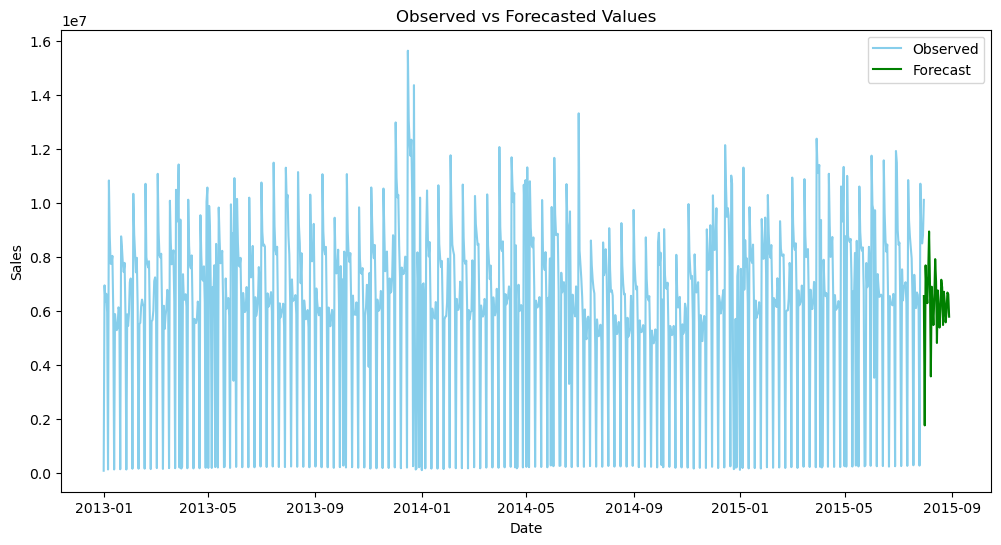

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['Sales'], label='Observed', color='skyblue')

# Plot forecasted values
forecast_index = pd.date_range(start=sales_data.index[-1], periods=30, freq='D')
plt.plot(forecast_index, forecast, label='Forecast', color='green')

plt.title('Observed vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 2617384.667422177
Mean Squared Error (MSE): 11174353498248.512
Root Mean Squared Error (RMSE): 3342806.2310353126
Mean Absolute Percentage Error (MAPE): 306.67638041018364


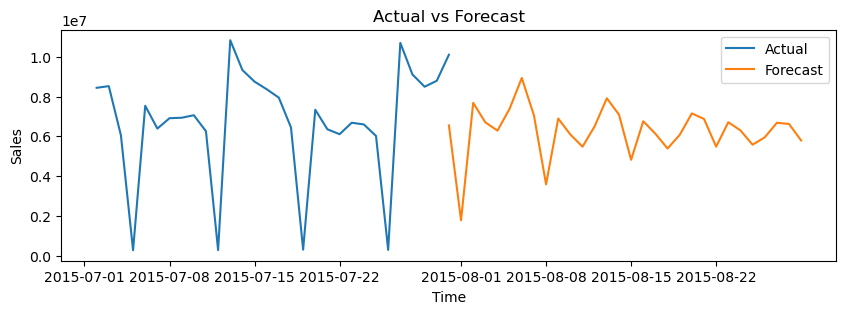

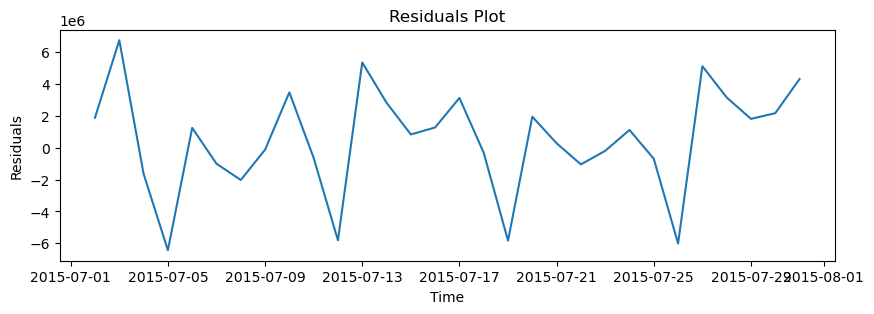

In [23]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract actual sales values for validation
actual_values = sales_data['Sales'].values[-30:]  # Assuming last 30 observations are for validation/testing

# Calculate forecast values
forecast_values = forecast.values

# Calculate metrics
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Visual Inspection
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(sales_data.index[-30:], actual_values, label='Actual')
plt.plot(pd.date_range(start=sales_data.index[-1], periods=30, freq='D'), forecast_values, label='Forecast')
plt.legend()
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

# Residual Analysis
residuals = actual_values - forecast_values.flatten()  # Flatten forecast values to match the shape of actual_values

plt.figure(figsize=(10, 3))
plt.plot(sales_data.index[-30:], residuals)
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

## SARIMA

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

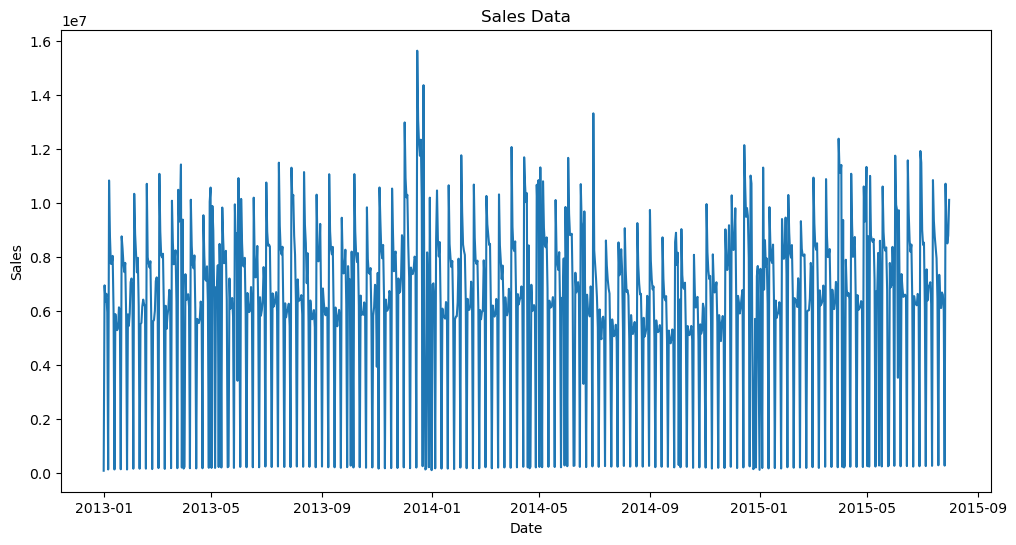

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(sales_data['Sales'])
plt.title('Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [34]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(sales_data, model='additive')
trend = decomposition.trend
seasonal =decomposition.seasonal
residual = decomposition.resid

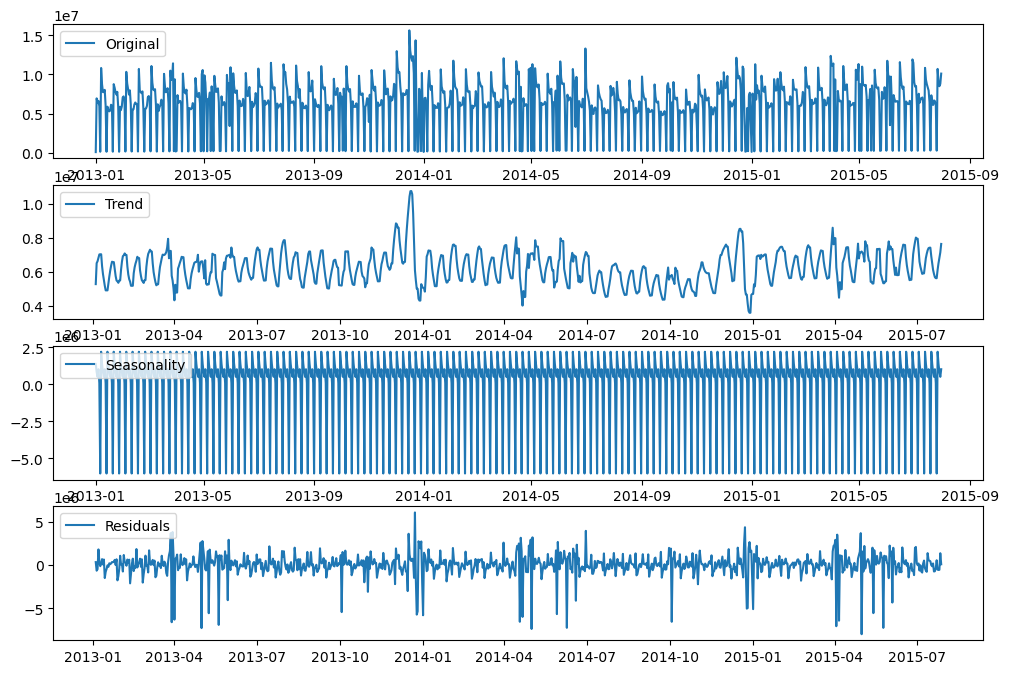

In [33]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sales_data, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.show()

c:\Users\pooji\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


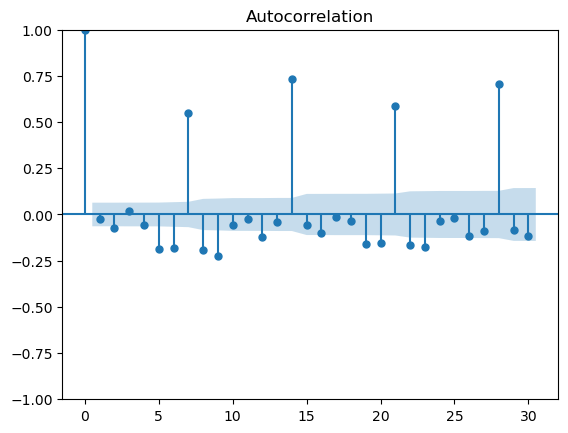

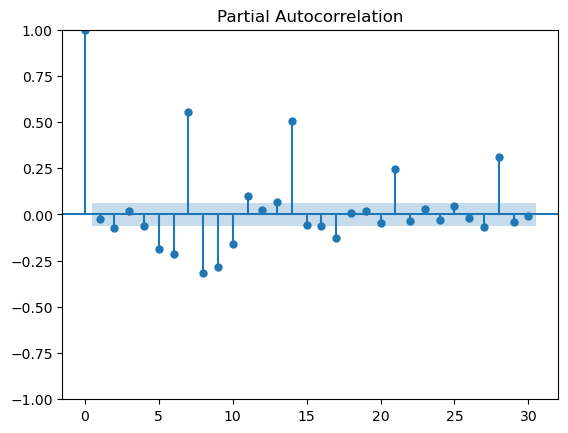

In [35]:
plot_acf(sales_data['Sales'])
plot_pacf(sales_data['Sales'])
plt.show()

In [37]:
result = sm.tsa.stattools.adfuller(sales_data['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:',result[4])

ADF Statistic: -4.7616145245956165
p-value: 6.436731330559263e-05
Critical Values: {'1%': -3.437470108019385, '5%': -2.8646832620852853, '10%': -2.5684436698650503}


Model Fitting

In [54]:
sarima_model = SARIMAX(sales_data['Sales'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))  
sarima_result = sarima_model.fit()

c:\Users\pooji\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [55]:
forecast_steps = 30 
forecast = sarima_result.forecast(steps=forecast_steps)

In [56]:
actual_values = sales_data['Sales'][-forecast_steps:]
mse = mean_squared_error(actual_values, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 20240009704837.516


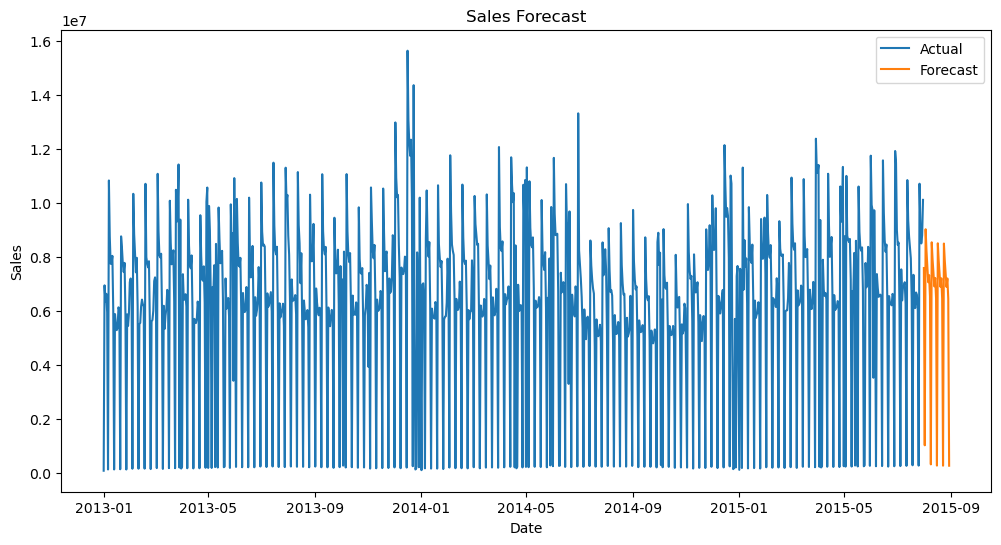

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['Sales'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()